In [1]:
import pandas as pd
import importlib
from datetime import date
import matplotlib.pyplot as plt

In [2]:
import modo_energy_client.modo_energy_api_client

importlib.reload(modo_energy_client.modo_energy_api_client)
from modo_energy_client.modo_energy_api_client import ModoEnergyAPIClient

client = ModoEnergyAPIClient(api_token="your_api_token_here")

In [4]:
ercot_bess = client.get_ercot_modo_owners(date_from="2023-01", date_to="2026-01")

Fetching pages : 0page [00:00, ?page/s]

In [5]:
# Group by the month of the 'date' column
ercot_bess["month"] = ercot_bess["date"].dt.to_period("M").dt.to_timestamp()
ercot_bess_monthly = (
    ercot_bess.groupby("month")
    .agg({"total_energy_capacity_mwh": "mean", "total_rated_power_mw": "mean"})
    .reset_index()
)
ercot_bess_monthly.head()

,month,total_energy_capacity_mwh,total_rated_power_mw
0,2023-01-01,113.945652,87.880435
1,2023-02-01,114.806522,88.741304
2,2023-03-01,114.806522,88.741304
3,2023-04-01,138.545652,97.436957
4,2023-05-01,147.154348,101.784783


In [7]:
fuel_mix = client.get_ercot_generation_fuel_mix(
    date_from=date(2024, 1, 1), date_to=date(2025, 12, 31)
)

Fetching pages : 0page [00:00, ?page/s]

In [8]:
fuel_mix

,coalAndLignite,hydro,nuclear,other,powerStorage,solar,wind,naturalGas,settlementType,repeated_hour_flag
timestamp,,,,,,,,,,
2025-12-30 23:59:58+00:00,7617.034668,42.869999,5109.535156,50.400002,4606.809570,1.766198,5009.707031,31245.342312,LIVE,False
2025-12-30 23:54:58+00:00,7617.784668,42.949997,5111.414062,50.500000,4730.941895,9.763080,4870.741211,31200.116323,LIVE,False
2025-12-30 23:49:58+00:00,7604.422852,43.129997,5113.125000,50.500000,4862.349121,31.864775,4751.761230,31072.759003,LIVE,False
2025-12-30 23:44:58+00:00,7597.127441,43.000000,5111.243164,50.299999,4636.292480,93.557419,4586.173340,30964.136370,LIVE,False
2025-12-30 23:39:58+00:00,7560.950684,43.060001,5109.760742,50.200001,4483.503906,215.724121,4428.757812,30843.648950,LIVE,False
...,...,...,...,...,...,...,...,...,...,...
2024-01-01 01:00:00+00:00,1894.436446,5.293643,1274.531748,4.361276,-56.735011,0.000094,3868.164764,4355.377550,FINAL,False
2024-01-01 00:45:00+00:00,2051.348418,5.296797,1274.367962,8.834108,-63.036449,0.000076,3777.404759,4374.518251,FINAL,False
2024-01-01 00:30:00+00:00,2156.873301,5.369277,1274.895463,43.919813,-43.988504,0.000081,3519.749322,4498.332277,FINAL,False


In [27]:
fuel_mix_monthly = fuel_mix.resample("ME").sum()

In [28]:
(fuel_mix_monthly[["coalAndLignite"]]).head(2)

,coalAndLignite
timestamp,
2024-01-31 00:00:00+00:00,6.139531e+06
2024-02-29 00:00:00+00:00,3.177929e+06


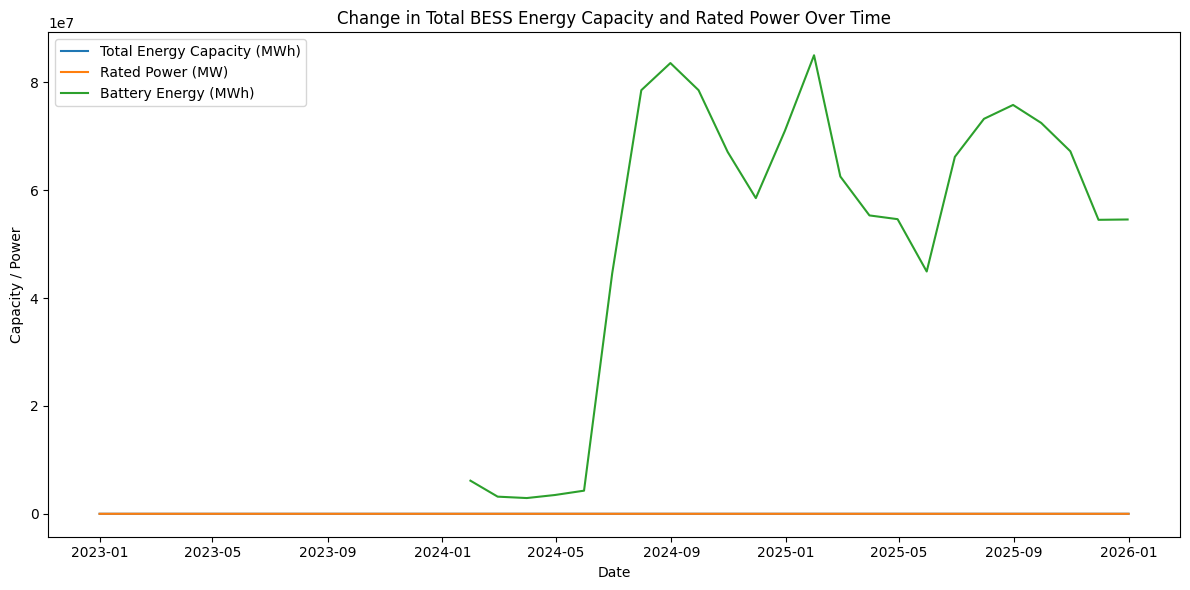

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(
    ercot_bess_monthly["month"],
    ercot_bess_monthly["total_energy_capacity_mwh"],
    label="Total Energy Capacity (MWh)",
)
plt.plot(
    ercot_bess_monthly["month"],
    ercot_bess_monthly["total_rated_power_mw"],
    label="Rated Power (MW)",
)
plt.plot(
    fuel_mix_monthly.index,
    fuel_mix_monthly["coalAndLignite"],
    label="Battery Energy (MWh)",
)
plt.xlabel("Date")
plt.ylabel("Capacity / Power")
plt.title("Change in Total BESS Energy Capacity and Rated Power Over Time")
plt.legend()

plt.tight_layout()
plt.show()